# **Basit Lineer Regresyon**
Beta0 ve Beta1 katsayıları vardır. Bir sabit ve bir Değişken

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Advertising.csv')
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


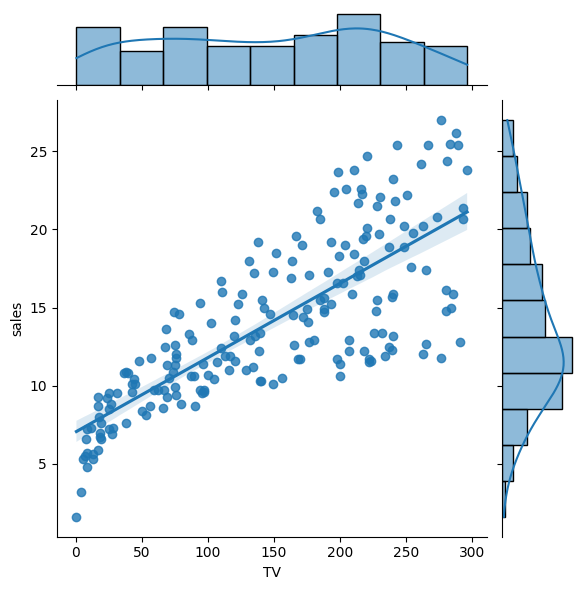

In [ ]:
import seaborn as sns
sns.jointplot(x = "TV", y= "sales", data = df, kind= "reg")

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[["TV"]]
Y= df[["sales"]]

In [ ]:
reg = LinearRegression() #lineer regreston initiate edilir yani bir model nesnesi oluşturulur. Örnekleme işlemi
model = reg.fit(X,Y) #Modeli fit etmek, kurmak.

In [ ]:
model

LinearRegression()

In [ ]:
dir(model) #Nesnenin içerisinden alabileceğimiz bazı bilgileri gösterir.

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

"İntercept _ " sabittir.

"Coef_" ifadesi ise katsayıdır yani Beta1 yerine alabiliriz.

In [ ]:
model.intercept_ #Beta0

array([7.03259355])

In [ ]:
model.coef_ #Beta1 katsayısı


array([[0.04753664]])

Rkare ifadesi modelin skorunu ifade eder. Rkare bağımsız değişkenlerdeki değişikliğin bağımlı değişkenlerce açıklanma yüzdesidir.

Yani basit regresyonda elimizdeki bağımsız değişkenleri kullandığımızda bağımlı değişkenin yaklaşık yüzde kaçını açıklayabildiğimizin bilgisini bize verir.

In [ ]:
#Bu örnekte satışlardaki değişikliğin yaklaşık %60'ı bağımsız değişkence açıklanmaktadır.
#RKare
model.score(X,Y)

0.611875050850071

# **Tahmin**

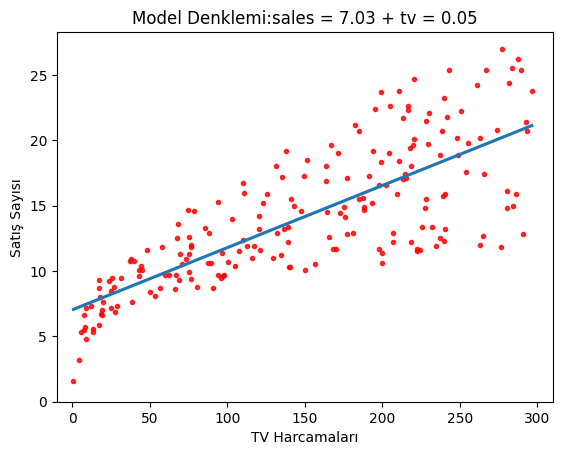

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(x=df["TV"], y=df["sales"], ci=None, scatter_kws={'color': 'r', 's': 9})
g.set_title("Model Denklemi:sales = 7.03 + tv = 0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);
#Satış sayısı ve tv harcamaları arasındaki ilişkiyi gösterir:

Bu grafiği oluşturduktan sonra, örn: pazarlama departmanı tv reklamlarına ne kadar yatırım yaparsa alacağı satış sonucu ne oluru tahmin etmeye çalışalım.

**Modelin formülü**

Sales= 7.03 + 0.05*TV

In [ ]:
#örn: manuel bir şekilde tahmin etmeye çalışırsak. TV değerine 165 verelim ve bu sonuca göre satışı tahmin etmeye çalışalım
7.03 + 0.05*165

15.280000000000001

In [ ]:
#Bu işlemleri scikit_learn aracılığı ile yapalım
Yeni_Veri = [[5], [15], [30]]
model.predict(Yeni_Veri) #Modelimi Yeni Veri datasetini kullanarak tahmin et

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.27027675],
       [7.74564316],
       [8.45869276]])

# **Artıklar**

**Gerçek Değerler**

In [ ]:
Y[0:10]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


**Tahmin Edilen Değerler**

In [ ]:
model.predict(X) [0:10] #Elimizdeki X yani TV değişkenlerini kullanarak Y yani Sales ları tahmin ettiriyoruz.

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

In [ ]:
gercek_y = Y[0:10]
tahmin_y = pd.DataFrame(model.predict(X) [0:10])

In [ ]:
Hatalar = pd.concat([gercek_y, tahmin_y], axis = 1)

In [ ]:
Hatalar

,sales,0
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [ ]:
Hatalar.columns=["gercek_y", "tahmin_y"]

In [ ]:
Hatalar

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [ ]:
Hatalar["Hata"] = Hatalar["gercek_y"] - Hatalar["tahmin_y"]

In [ ]:
Hatalar

,gercek_y,tahmin_y,Hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [ ]:
Hatalar["Hatalar_Kare"] = Hatalar["Hata"]**2

In [ ]:
Hatalar

,gercek_y,tahmin_y,Hata,Hatalar_Kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [ ]:
import numpy as np

In [ ]:
np.mean(Hatalar["Hatalar_Kare"]) #10 gözlem için elde ettiğimiz ortalama hata

9.290350329638102